In [4]:
import matplotlib.pyplot as plt

In [5]:
ORIENT=['N','E','S','W']
pelouse=[5,5]


In [6]:
def get_file_info(file):
    file_object  = open(file, "r")
    content=file_object.readlines()
    file_object.close()

    return(content)

In [7]:
print(get_file_info('test.txt'))

['5 5\n', '5 5 N\n', 'AAAAA\n', '5 5 S\n', 'AAAAA\n']


In [15]:
class Tondeuse:
  position=[0,0]
  orientation=""

    
  def __repr__(self):
    return "<Tondeuse: Position = " + str(self.position) + "; orientation = " + str(self.orientation) + ">" 

def mouvement_tondeuse(sequence,tondeuse):
        for i in range(len(sequence)):
          #print(len(sequence))
          indice=ORIENT.index(tondeuse.orientation) 
          #print(indice)
          if (sequence[i]=="D"):
                if(tondeuse.orientation=="W"):
                  tondeuse.orientation="N"
                else:
                  tondeuse.orientation =ORIENT[indice+1]
          if (sequence[i]=="G"):
             if(tondeuse.orientation=="N"):
               tondeuse.orientation="W"
             else:
               tondeuse.orientation=ORIENT[indice-1]
          if (sequence[i]=="A"):
              directon=tondeuse.orientation
              if (directon=="N"):
                if(int(tondeuse.position[1])<int(pelouse[1])):
                  tondeuse.position[1]=tondeuse.position[1]+1
              if (directon=="S"):
                if(int(tondeuse.position[1])>0):
                  tondeuse.position[1]=tondeuse.position[1]-1
              if (directon=="E"):
                if(int(tondeuse.position[0])<int(pelouse[0])):
                  tondeuse.position[0]=tondeuse.position[0]+1
              if (directon=="W"):
                if(int(tondeuse.position[0])>0):
                   tondeuse.position[0]=tondeuse.position[0]-1
                
        
        return tondeuse;


In [16]:
class Pelouse:
  largeur=5
  longueur=5

Etat de la tondeuse au depart
<Tondeuse: Position = [5, 5]; orientation = N>
Mouvement
AAAAA
Etat de la tondeuse à la fin
<Tondeuse: Position = [5, 5]; orientation = N>
Etat de la tondeuse au depart
<Tondeuse: Position = [5, 5]; orientation = S>
Mouvement
AAAAA
Etat de la tondeuse à la fin
<Tondeuse: Position = [5, 0]; orientation = S>
[5, 5, 5, 5]
[5, 5, 5, 0]


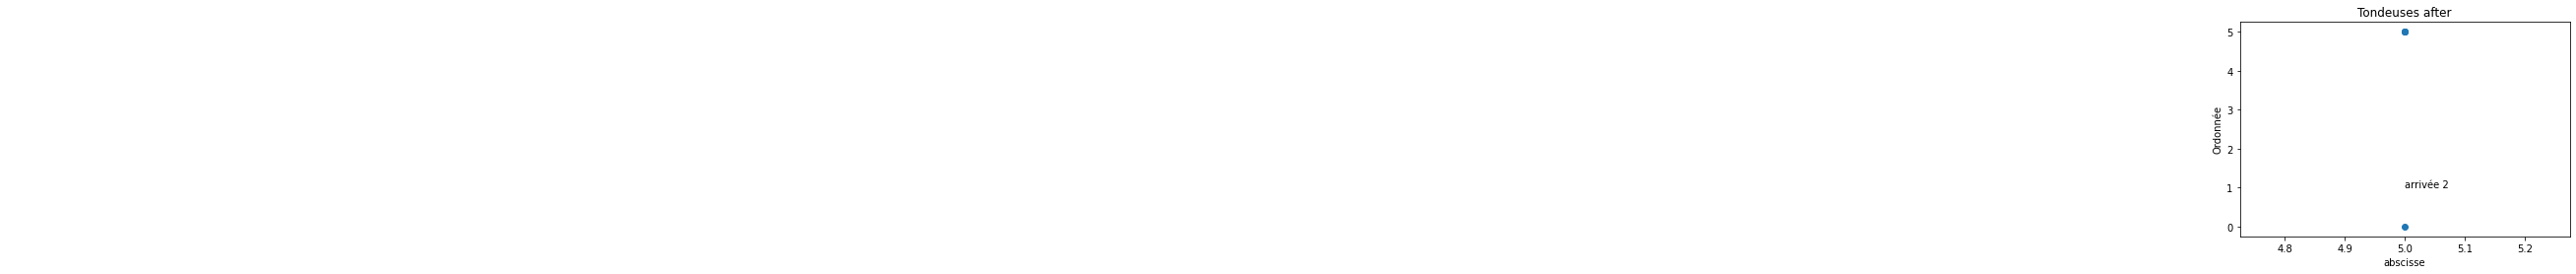

In [17]:
t1 = Tondeuse()
t1.position=[1,1]
t1.orientation="N"
## recuperation des données du fichier pour la suite 

data=get_file_info('test.txt')
#print(data)
pelouse=data[0].split()
liste_tondeuse=[]
#print(pelouse)
#initialisation des tondeuses
x1=[]
y1=[]
for i in range(1,len(data)):
    if (i%2==1):
        position=data[i].split()
        temp=Tondeuse()
        temp.position=[position[0],position[1]]
        x1.append(int(position[0]))
        y1.append(int(position[1]))
        temp.orientation=position[2]
        sequence=data[i+1].split()[0]
        liste_tondeuse.append({"tondeuse":temp,"sequence":sequence})
        
#print(liste_tondeuse)

#deplacement des tondeuses

for tondeuse in liste_tondeuse:
    temp=Tondeuse()
    temp.position=[int(tondeuse["tondeuse"].position[0]),int(tondeuse["tondeuse"].position[1])]
    temp.orientation=tondeuse["tondeuse"].orientation
    print("Etat de la tondeuse au depart")
    print(temp)
    print("Mouvement")
    print(tondeuse["sequence"])
    print("Etat de la tondeuse à la fin")
    print(mouvement_tondeuse(tondeuse["sequence"],temp))
    x1.append(mouvement_tondeuse(tondeuse["sequence"],temp).position[0])
    y1.append(mouvement_tondeuse(tondeuse["sequence"],temp).position[1])
    


print(x1)
print(y1)
plt.title("Tondeuses after")
plt.xlabel("abscisse")
plt.ylabel("Ordonnée")
plt.annotate("depart 1", (1, 2))
plt.annotate("depart 2",(3,3))
plt.annotate("arrivée 1", (1, 3))
plt.annotate("arrivée 2",(5,1))
plt.plot(x1,y1,'o')
    
    
